# Getting Started
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

## Instructions

We are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

'RM' is the average number of rooms among homes in the neighborhood.
'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

MEDV gives the price

1. Clean the data
2. Calculate the minimum, maximum, mean, median, and standard deviation of 'MEDV', which is stored in prices. Store each calculation in their respective variable.
3. Explore the data and plot the trends. Write a summary of your observation.
4. Machine Learning! Create a model to predict the prices

In [11]:
import pandas as pd

In [12]:
housing_data = pd.read_csv('housing.csv', na_values=['NaN'])
housing_data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,NaN,701400
4,7.147,5.33,18.7,760200


In [13]:
housing_data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,486.000000,487.000000,487.000000,4.890000e+02
mean,6.258934,12.939815,18.554825,4.543429e+05
std,0.757978,7.096546,2.326191,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.879250,7.355000,17.400000,3.507000e+05
50%,6.183500,11.660000,19.100000,4.389000e+05
75%,6.587250,17.135000,20.200000,5.187000e+05
max,15.000000,37.970000,40.000000,1.024800e+06


In [14]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

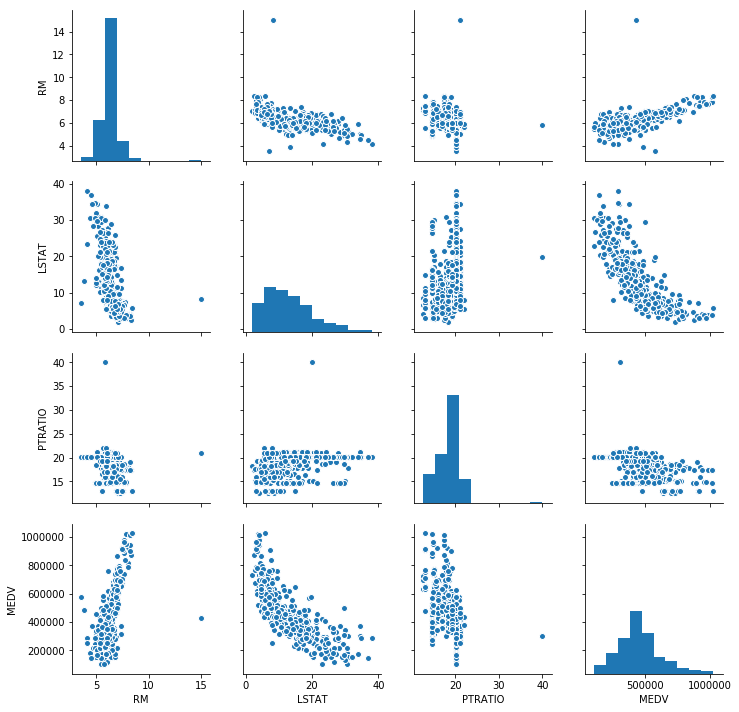

In [15]:
sb.pairplot(housing_data.dropna())

In [16]:
housing_data = housing_data.loc[(housing_data['RM'] <= 10)]

''

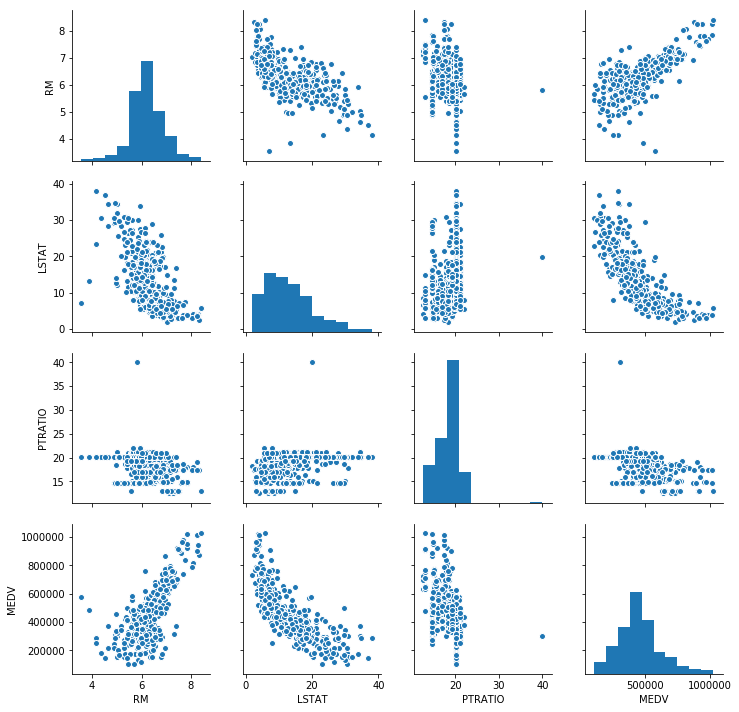

In [17]:
sb.pairplot(housing_data.dropna())

In [18]:
housing_data = housing_data.loc[(housing_data['PTRATIO'] <= 30)]

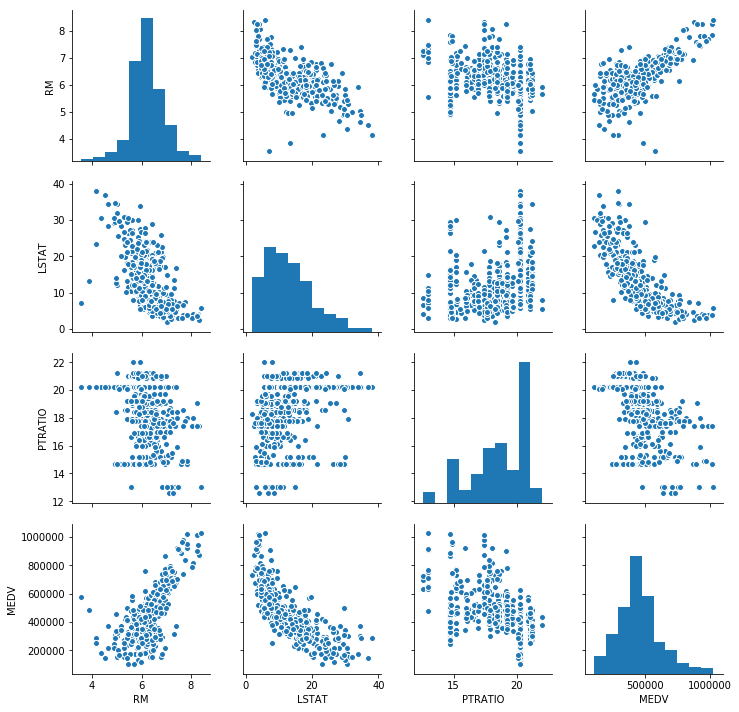

In [19]:
sb.pairplot(housing_data.dropna())

In [20]:
housing_data.loc[(housing_data['RM'].isnull()) |
              (housing_data['LSTAT'].isnull()) |
              (housing_data['PTRATIO'].isnull()) |
              (housing_data['MEDV'].isnull())]

,RM,LSTAT,PTRATIO,MEDV
454,6.229,NaN,20.2,411600
481,6.019,NaN,19.2,445200


In [21]:
housing_data = housing_data.dropna()

In [22]:
housing_data.loc[(housing_data['RM'].isnull()) |
              (housing_data['LSTAT'].isnull()) |
              (housing_data['PTRATIO'].isnull()) |
              (housing_data['MEDV'].isnull())]

,RM,LSTAT,PTRATIO,MEDV


In [23]:
y = housing_data.MEDV
housing_features = ['RM','LSTAT','PTRATIO']


In [24]:
X = housing_data[housing_features]

In [26]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
housing_mod = DecisionTreeRegressor(random_state=1)

# Fit model
housing_mod.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [27]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(housing_mod.predict(X.head()))

Making predictions for the following 5 houses:
      RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
4  7.147   5.33     18.7
6  6.012  12.43     15.2
The predictions are
[504000. 453600. 728700. 760200. 480900.]
